# projeto final datascience
Walter Alves da Silva  
link do dataset:  
https://www.kaggle.com/datasets/datacertlaboratoria/projeto-3-segmentao-de-clientes-no-ecommerce/data

## imports e loads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv('vendas-por-fatura.csv')
df.head()

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


## preparação dos dados

### removendo dupliicata

In [3]:
df.drop_duplicates(inplace=True)

### convertendo valor para numero

In [4]:
df['Valor'] = df['Valor'].map( lambda x:x.replace(',','.'))#formato brasil
df['Valor'] = df['Valor'].map( lambda x:float(x))

### removendo vendas negativas

In [5]:
df = df[(df.Quantidade > 0) | (df.Valor > 0)]
df

,N° da fatura,Data da fatura,ID Cliente,País,Quantidade,Valor
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...
25945,579252,11/28/2021 16:47:00,17450.0,United Kingdom,432,1034.40
25946,574908,11/7/2021 15:37:00,16009.0,United Kingdom,28,82.76
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720.00
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,298.78


### criando tabela com vendas totais

In [6]:
df['total_venda'] = df['Valor'] * df['Quantidade']

In [7]:
# remover colunas que não vao ser utilizadas
df.drop(['Valor','Quantidade'],axis=1,inplace=True)

### removendo numero da fatura pois é um identificador  
identificadores não quantizao e nem classificam o produto, funcionam como um ID

In [8]:
df.drop(['N° da fatura'],axis=1,inplace=True)

### trabalhando a data

In [9]:
df['Data da fatura'] = pd.to_datetime(df['Data da fatura'])#converte formato para data

In [10]:
df["Data da fatura"] = df['Data da fatura'].dt.strftime('%Y-%m')#resume em ano e mes
df.head()

,Data da fatura,ID Cliente,País,total_venda
0,2021-03,15528.0,United Kingdom,28207.59
1,2021-11,17348.0,United Kingdom,34185.99
3,2021-04,17045.0,United Kingdom,39.95
4,2021-10,16416.0,United Kingdom,123104.31
5,2021-11,13816.0,Germany,18198.18


verificando a amplitude da data

In [11]:
print(df["Data da fatura"].min())
print(df["Data da fatura"].max())

2020-12
2021-12


In [12]:
def converter_data(data:str)->str:
    """converte a data para dia do mes, com dezembro anterior = 0
    Args:
        data (str):
    Returns:
        str:
    """
    return data[-2:]

df["Data da fatura"] = df["Data da fatura"].map(lambda x:converter_data(x))
df["Data da fatura"] = df["Data da fatura"].map(lambda x:int(x))

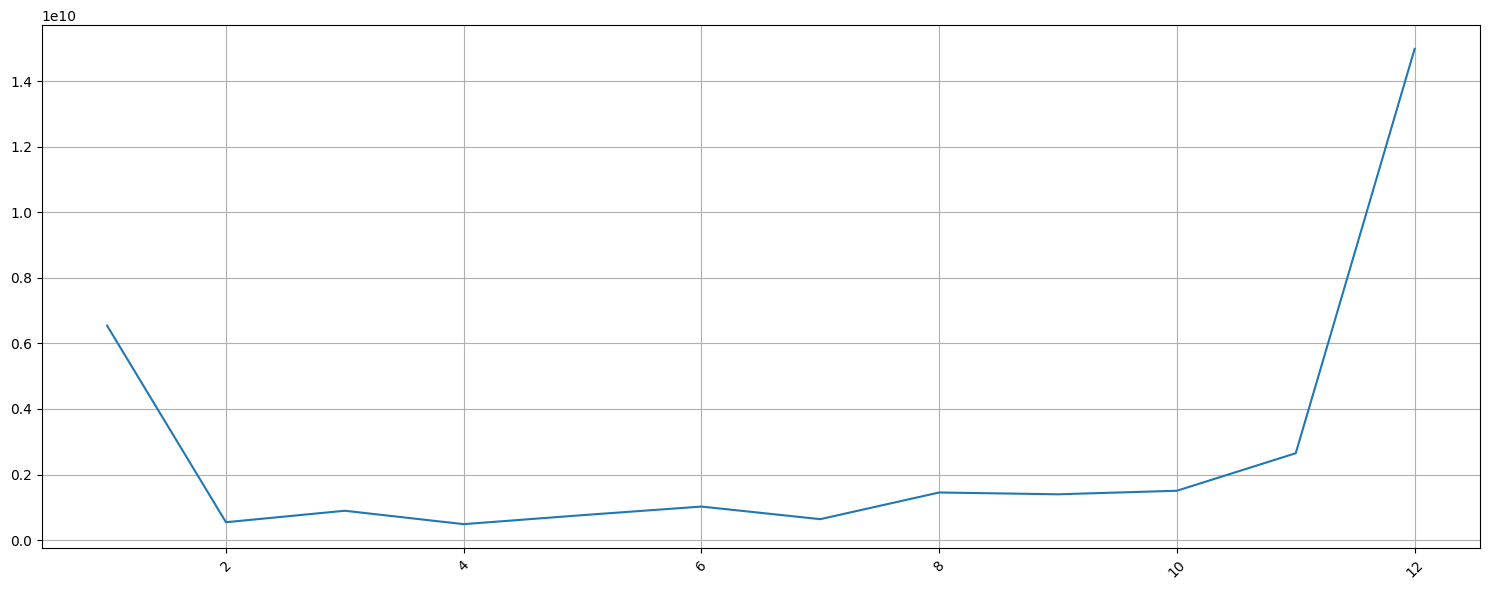

In [13]:

df_graf = df[["Data da fatura", 'total_venda']]
df_graf = df_graf.groupby("Data da fatura", as_index=False).sum()

x = df_graf[["Data da fatura"]]
y = df_graf[['total_venda']]

plt.figure(figsize=(15, 6))
plt.plot(x, y, linestyle="-")
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
#removendo datas 0 e 12 pois aparemtam ser outliars
df = df[df['Data da fatura'] != 12]
df = df[df['Data da fatura'] != 1]
df['Data da fatura'] = df['Data da fatura'].map(lambda x: int(x))

### verificando paises

In [15]:
df['País'].unique()

array(['United Kingdom', 'Germany', 'EIRE', 'France', 'Sweden', 'Italy',
       'Israel', 'Portugal', 'Netherlands', 'Channel Islands', 'Belgium',
       'Switzerland', 'Spain', 'Japan', 'United Arab Emirates', 'Finland',
       'Norway', 'Hong Kong', 'Denmark', 'Australia', 'USA', 'Singapore',
       'European Community', 'Cyprus', 'Iceland', 'Unspecified', 'Malta',
       'Austria', 'Canada', 'Poland', 'Greece', 'Czech Republic',
       'Brazil', 'RSA', 'Bahrain', 'Saudi Arabia'], dtype=object)

### fill ID cliente

In [16]:
# df['ID Cliente'] = df['ID Cliente'].map(lambda x: int(x))

### reset index

In [17]:
df.reset_index(drop=True, inplace=True)

## analise exploratoria

### vendas por pais 

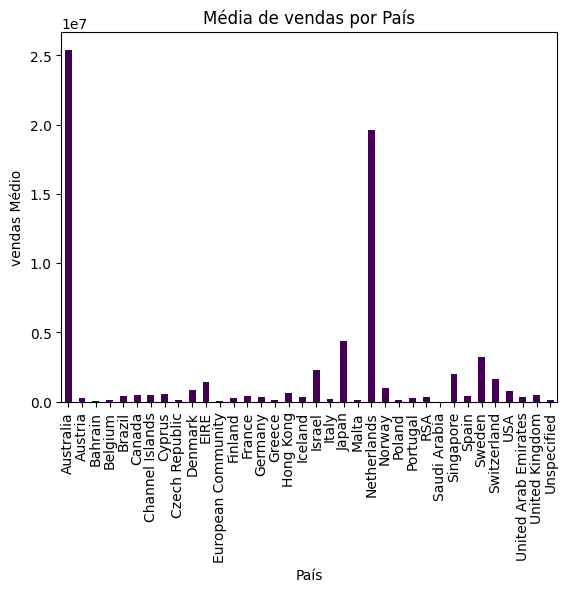

In [18]:
df_agrupado = df.groupby('País')['total_venda'].mean()
# Criando o gráfico de colunas
df_agrupado.plot(kind='bar', colormap='viridis')

# Definindo título e rótulos dos eixos
plt.title('Média de vendas por País')
plt.xlabel('País')
plt.ylabel('vendas Médio')

# Mostrando o gráfico
plt.show()

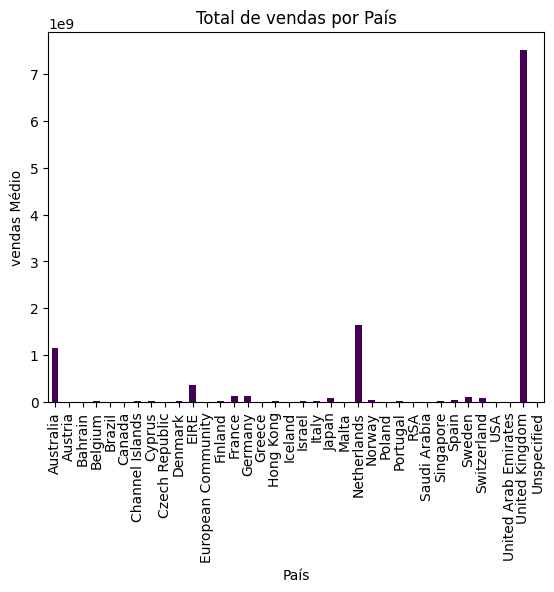

In [19]:
df_agrupado = df.groupby('País')['total_venda'].sum()
# Criando o gráfico de colunas
df_agrupado.plot(kind='bar', colormap='viridis')

# Definindo título e rótulos dos eixos
plt.title('Total de vendas por País')
plt.xlabel('País')
plt.ylabel('vendas Médio')

# Mostrando o gráfico
plt.show()

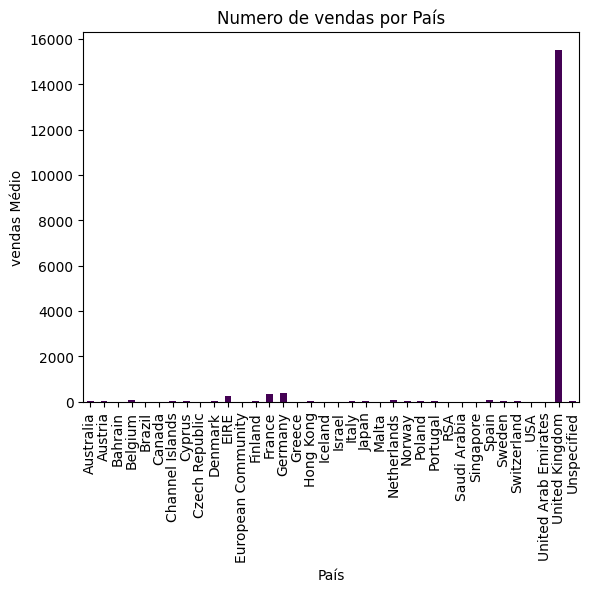

In [20]:
df_agrupado = df.groupby('País')['total_venda'].count()
# Criando o gráfico de colunas
df_agrupado.plot(kind='bar', colormap='viridis')

# Definindo título e rótulos dos eixos
plt.title('Numero de vendas por País')
plt.xlabel('País')
plt.ylabel('vendas Médio')

# Mostrando o gráfico
plt.show()

apartir dos graficos notou-se que o pais mais com maior volume de venda e valor bruto é o reino unido, mas o pais com maior valor por produto é a Noruega e a Australia que apesar de comprar pouco, compra produtos mais caros.

### pais com mais cliente

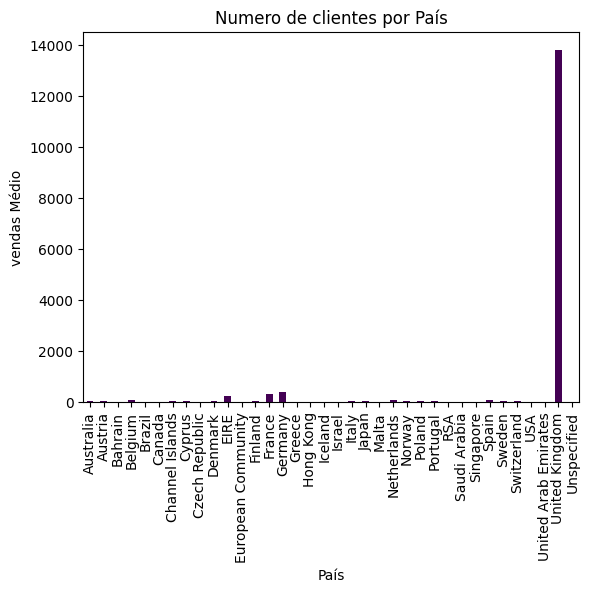

In [21]:
df_agrupado = df.groupby('País')['ID Cliente'].count()
# Criando o gráfico de colunas
df_agrupado.plot(kind='bar', colormap='viridis')

# Definindo título e rótulos dos eixos
plt.title('Numero de clientes por País')
plt.xlabel('País')
plt.ylabel('vendas Médio')

# Mostrando o gráfico
plt.show()

com exeção do reio unido os paises com maior numeroo de clientes são a alemanha e frança

### conclusão
apartir das analises e seguro sugerir um marketing diferenciado para a australia e a Noruega, pois os mesmos apresentam uma caracteristica incomun ao padrão de consumo  
devido a enorme descrepencia no pais de compra os dados vao ser analisados em 3 grupos  
com todos os paises, apenas a inglaterra, e sem a inglaterra, pois sua massiva presença nos dados pode causar um vies ao aprendizado de maquina, fazendo o computador concluir que o resto dos paises se comportam como a inglaterra.

### dividindo em 3 grupos

In [22]:
df_inglaterra = df.query("País == 'United Kingdom'")
df_nao_inglaterra = df.query("País != 'United Kingdom'")
df_inglaterra.reset_index(drop=True, inplace=True)
df_nao_inglaterra.reset_index(drop=True, inplace=True)
print(df_inglaterra.head())
print(df_nao_inglaterra.head())


   Data da fatura  ID Cliente            País  total_venda
0               3     15528.0  United Kingdom     28207.59
1              11     17348.0  United Kingdom     34185.99
2               4     17045.0  United Kingdom        39.95
3              10     16416.0  United Kingdom    123104.31
4               2     13489.0  United Kingdom      4945.92
   Data da fatura  ID Cliente     País  total_venda
0              11     13816.0  Germany     18198.18
1              10     14911.0     EIRE     27636.10
2              11     12659.0   France      9626.40
3              11     17404.0   Sweden   1312788.80
4               8     12610.0    Italy     51996.00


#### grafico geral, com todos os países

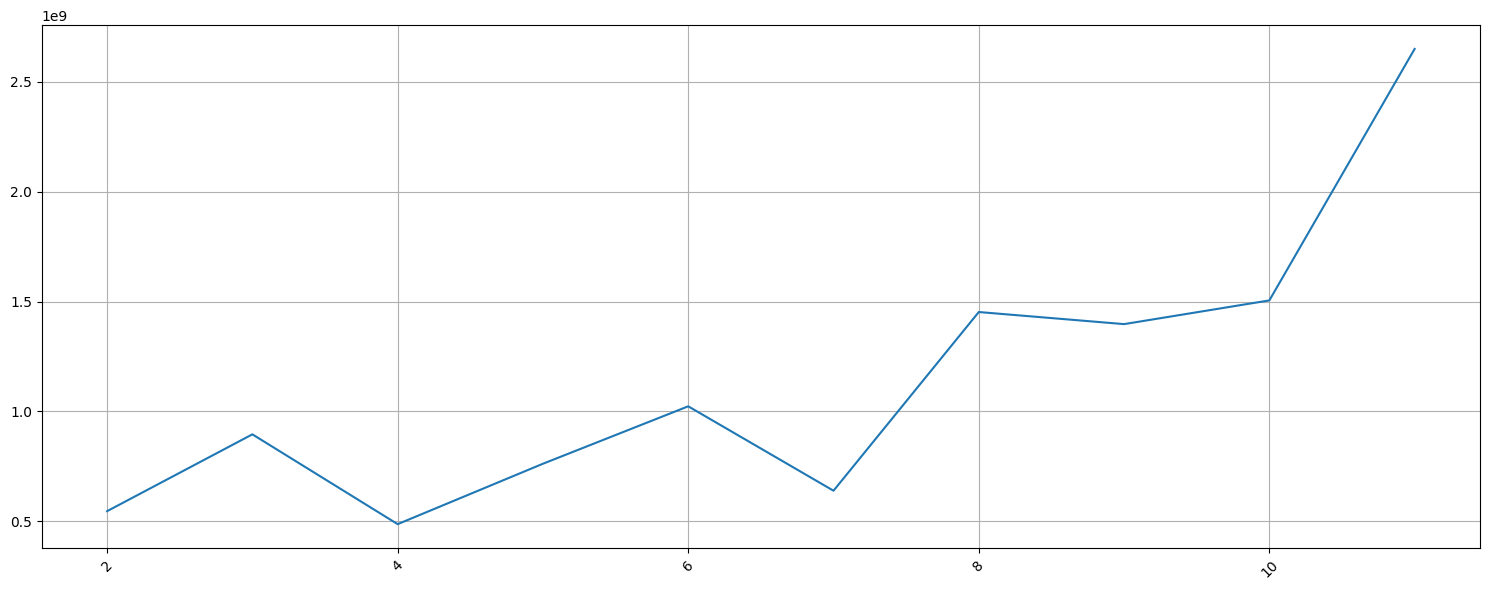

In [23]:
df_graf = df[["Data da fatura", 'total_venda']]
df_graf = df_graf.groupby("Data da fatura", as_index=False).sum()

x = df_graf[["Data da fatura"]]
y = df_graf[['total_venda']]

plt.figure(figsize=(15, 6))
plt.plot(x, y, linestyle="-")
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### apenas a inglaterra

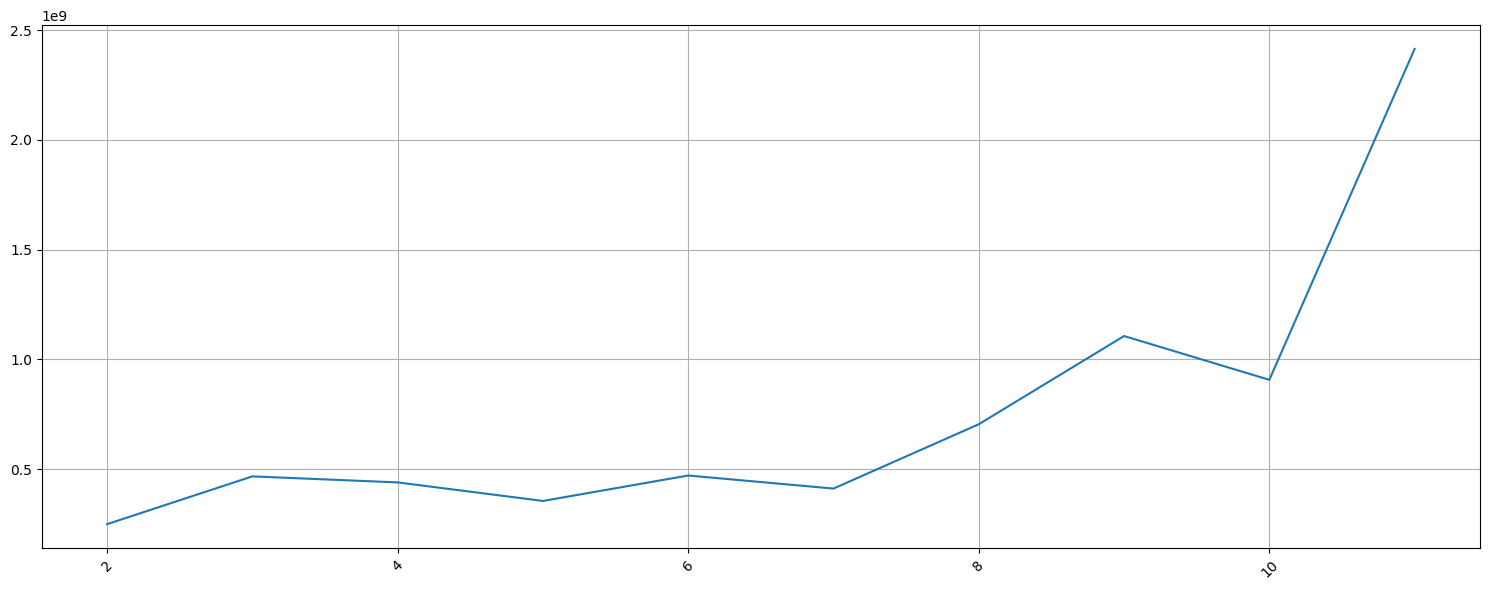

In [24]:
df_graf = df_inglaterra[["Data da fatura", 'total_venda']]
df_graf = df_graf.groupby("Data da fatura", as_index=False).sum()

x = df_graf[["Data da fatura"]]
y = df_graf[['total_venda']]

plt.figure(figsize=(15, 6))
plt.plot(x, y, linestyle="-")
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### sem a inglaterra

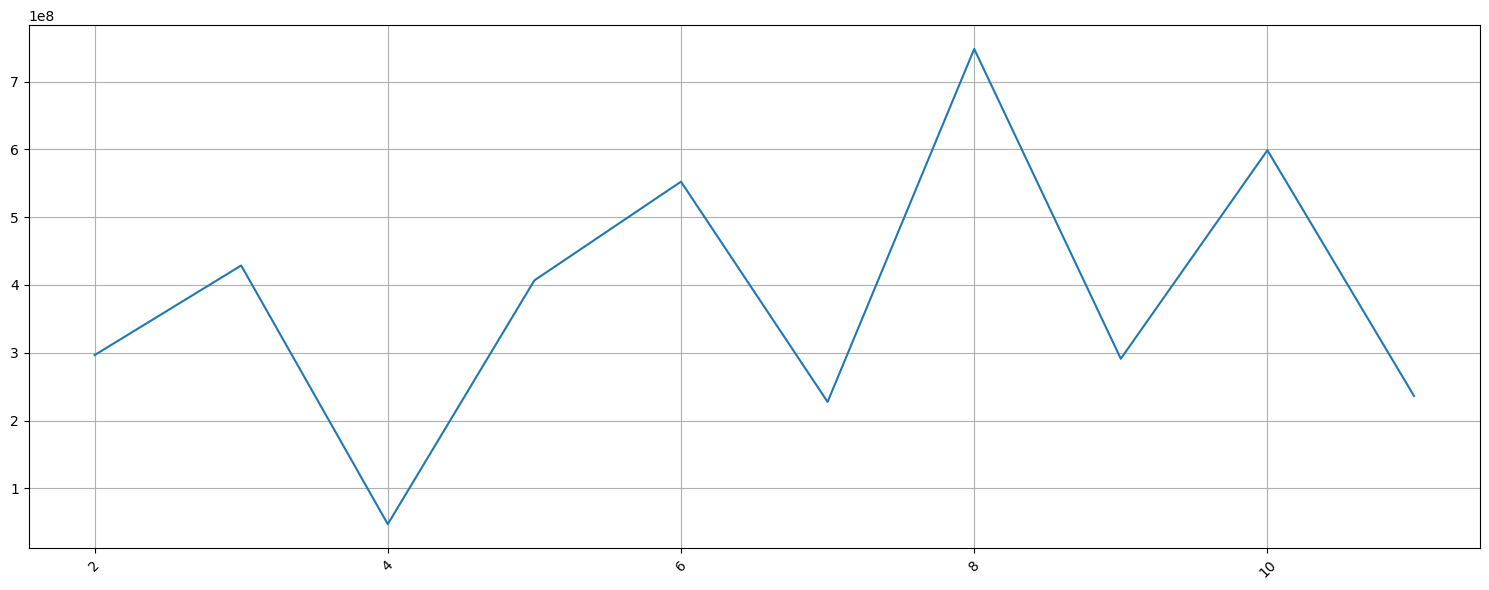

In [25]:
df_graf = df_nao_inglaterra[["Data da fatura", 'total_venda']]
df_graf = df_graf.groupby("Data da fatura", as_index=False).sum()

x = df_graf[["Data da fatura"]]
y = df_graf[['total_venda']]

plt.figure(figsize=(15, 6))
plt.plot(x, y, linestyle="-")
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### conclusao 2
observase que na inglaterra tem um grande aumento de compras nos periodos proximo ao natal, o mesmo não se observa aos outros paises, isso pode se dar a diferenças culturais.

## Machine Learning

### com todos os paises

In [26]:
x = df[['Data da fatura']]
y = df['total_venda']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

floresta = LinearRegression()
floresta.fit(x_treino, y_treino)

previsao = floresta.predict(x_teste)

print(f"Regressão linear: erro medio quadratico {mean_squared_error(y_teste, previsao)}, erro medio absoluto {mean_absolute_error(y_teste, previsao)}")



x = df[['Data da fatura']]
y = df['total_venda']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

floresta = SGDRegressor()
floresta.fit(x_treino, y_treino)

previsao = floresta.predict(x_teste)

print(f"Regressão SGD: erro medio quadratico {mean_squared_error(y_teste, previsao)}, erro medio absoluto {mean_absolute_error(y_teste, previsao)}")

Regressão linear: erro medio quadratico 40715948727221.7, erro medio absoluto 986360.2124255482
Regressão SGD: erro medio quadratico 113321934900988.42, erro medio absoluto 1730169.1384085736


foi possivel conseguir uma tabela com erro abaixo do desvio padrão, vamos fazer o mesmo para apenas a inglaterra e exeto a inglaterra

### apenas a inglaterra

In [44]:
x = df_inglaterra[['Data da fatura']]
y = df_inglaterra['total_venda']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

floresta = LinearRegression()
floresta.fit(x_treino, y_treino)

previsao = floresta.predict(x_teste)

print(f"Regressão linear: erro medio quadratico {mean_squared_error(y_teste, previsao)}, erro medio absoluto {mean_absolute_error(y_teste, previsao)}")



x = df[['Data da fatura']]
y = df['total_venda']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

floresta = SGDRegressor()
floresta.fit(x_treino, y_treino)

previsao = floresta.predict(x_teste)

print(f"Regressão SGD: erro medio quadratico {mean_squared_error(y_teste, previsao)}, erro medio absoluto {mean_absolute_error(y_teste, previsao)}")

Regressão linear: erro medio quadratico 2597268268333.3604, erro medio absoluto 620434.0268635195
Regressão SGD: erro medio quadratico 229036264671788.97, erro medio absoluto 6220830.986021834


ainda melhor precisão foi notada, provavelmente por que se trata de uma mesma cultura

### sem a inglaterra

In [51]:
x = df_nao_inglaterra[['Data da fatura']]
y = df_nao_inglaterra['total_venda']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

floresta = LinearRegression()
floresta.fit(x_treino, y_treino)

previsao = floresta.predict(x_teste)

print(f"Regressão linear: erro medio quadratico {mean_squared_error(y_teste, previsao)}, erro medio absoluto {mean_absolute_error(y_teste, previsao)}")



x = df[['Data da fatura']]
y = df['total_venda']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

floresta = SGDRegressor()
floresta.fit(x_treino, y_treino)

previsao = floresta.predict(x_teste)

print(f"Regressão SGD: erro medio quadratico {mean_squared_error(y_teste, previsao)}, erro medio absoluto {mean_absolute_error(y_teste, previsao)}")

Regressão linear: erro medio quadratico 203560881204829.12, erro medio absoluto 3532227.146041969
Regressão SGD: erro medio quadratico 45387801671013.27, erro medio absoluto 659901.0893665646


uma precisão pior foi detectada, provavelmente pela mixtura cultural

In [52]:
df.describe()

,Data da fatura,ID Cliente,total_venda
count,17174.000000,15394.000000,1.717400e+04
mean,7.134156,15259.593218,6.611208e+05
std,2.930024,1729.093798,1.062791e+07
min,2.000000,12347.000000,-1.106206e+04
25%,5.000000,13771.000000,9.235625e+03
50%,7.000000,15159.000000,4.299308e+04
75%,10.000000,16764.000000,1.333184e+05
max,11.000000,18287.000000,7.490614e+08


## conclusão

Atraves da analise exploratoria foi posssivel bservar um padrão diferenciado de compras na Australia e Noruega  
sendo recomendado analisar a nescecidade de uma ação diferente com esses paises que possam otimizar as vendas  
a absurda maiorria das vendas vem do Reio Unido, e como observado com os regressores é recomendado analisar 
separadamente o reino unido dos outros paises